In [1]:
# Instalando la última versión de pandas_profiling
!pip install pandas_profiling

In [1]:
# Importando las librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import io # porque los datos de tiendas no están codificados en utf8
import missingno as msno 
pd.options.display.max_columns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0

In [15]:
pd.set_option('display.max_columns', None)
%matplotlib inline

<h1>App tracking</h1>

In [5]:
# Importando los datos de clientes
app_tracking = pd.read_csv('/content/sample_data/data/App Tracking.csv', sep = ',')
app_tracking.shape


(27302, 15)

In [6]:
app_tracking.head()

,Fecha,Nombre en pantalla,Profundidad de pantalla,Pantalla de destino,Pantalla de salida,Visualizaciones de pantalla,% Δ,Visitas únicas a una pantalla,% Δ.1,Pantallas/sesión,% Δ.2,Tiempo en pantalla,% Δ.3,Media. El tiempo en la pantalla,% Δ.4
0,20200814,www.ceramicaitalia.com/,0,www.ceramicaitalia.com/,www.ceramicaitalia.com/,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
1,20200810,www.ceramicaitalia.com/,0,www.ceramicaitalia.com/,www.ceramicaitalia.com/,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
2,20200828,www.ceramicaitalia.com/,0,www.ceramicaitalia.com/,www.ceramicaitalia.com/,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
3,20200817,www.ceramicaitalia.com/,0,www.ceramicaitalia.com/,www.ceramicaitalia.com/,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
4,20200813,www.ceramicaitalia.com/,0,www.ceramicaitalia.com/,www.ceramicaitalia.com/,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN


In [9]:
app_tracking.info

<bound method DataFrame.info of           Fecha                                 Nombre en pantalla  \
0      20200814                            www.ceramicaitalia.com/   
1      20200810                            www.ceramicaitalia.com/   
2      20200828                            www.ceramicaitalia.com/   
3      20200817                            www.ceramicaitalia.com/   
4      20200813                            www.ceramicaitalia.com/   
...         ...                                                ...   
27297  20200821  www.ceramicaitalia.com/salondetendencias/detal...   
27298  20200813  www.ceramicaitalia.com/ceramica-italia/3011-si...   
27299  20200813  www.ceramicaitalia.com/ceramica-italia/2122-mo...   
27300  20200821  www.ceramicaitalia.com/buscar?controller=searc...   
27301  20200812  www.ceramicaitalia.com/ceramica-italia/2134-di...   

       Profundidad de pantalla  \
0                            0   
1                            0   
2                        

In [10]:
# # Generando el reporte de los datos usando pandas profiling
# title = 'App tracking de Cerámica Italia'
# profile_clientes = pandas_profiling.ProfileReport(app_tracking, title = title, dark_mode= True)


In [11]:
# Visualizando el reporte
# profile_clientes.to_notebook_iframe()

In [12]:
# ! pip install missingno


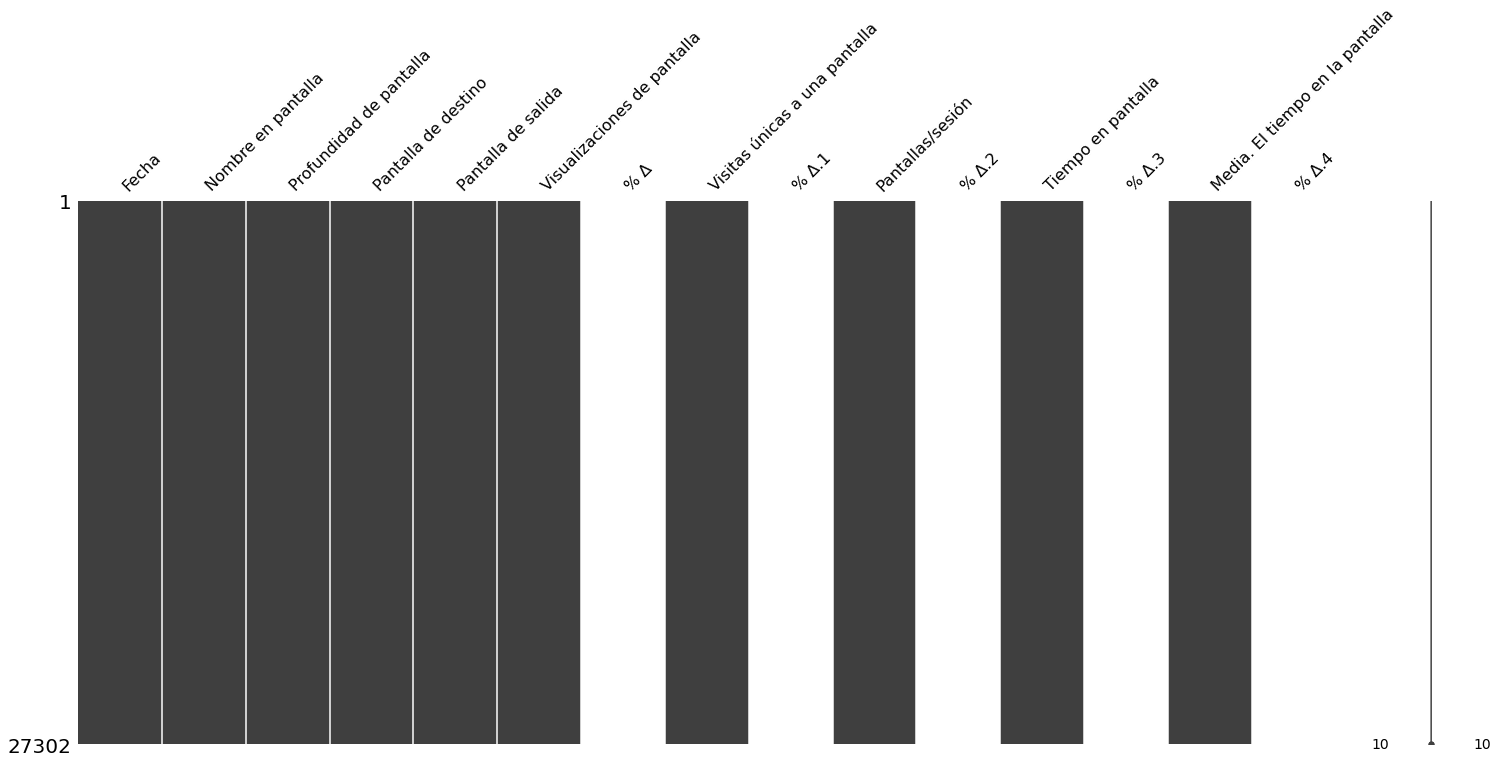

In [16]:
msno.matrix(app_tracking) 

In [17]:
for col in app_tracking:
    print("Column:", col ,'\n', app_tracking[col].unique(),'\n','\n')

Column: Fecha 
 [20200814 20200810 20200828 20200817 20200813 20200818 20200815 20200812
 20200811 20200807 20200809 20200823 20200820 20200824 20200831 20200825
 20200830 20200829 20200822 20200816 20200819 20200821 20200808 20200804
 20200805 20200827 20200806 20200826] 
 

Column: Nombre en pantalla 
 ['www.ceramicaitalia.com/'
 'www.ceramicaitalia.com/ceramica-italia/1994-fortezza-avellana'
 'www.ceramicaitalia.com/ceramica-italia/1936-marmol-habana-negro' ...
 'www.ceramicaitalia.com/ceramica-italia/3011-silver-55x55-?search_query=SILVER&results=3'
 'www.ceramicaitalia.com/ceramica-italia/2122-monserrate-gris?search_query=MONSERRATE+GR&results=4'
 'www.ceramicaitalia.com/buscar?controller=search&orderby=position&orderway=desc&search_query=opera&submit_search='] 
 

Column: Profundidad de pantalla 
 [0] 
 

Column: Pantalla de destino 
 ['www.ceramicaitalia.com/'
 'www.ceramicaitalia.com/ceramica-italia/1994-fortezza-avellana'
 'www.ceramicaitalia.com/ceramica-italia/1936-marmol-ha

We can see that there is any information in this table.
there are four columns with its values as null , other columns are full of zeros
so the only information that we have available is from the columns 'Nombre en pantalla','Pantalla de destino' and 'Pantalla de salida' which are very similar and probably they dont give any useful information

<h1>Audiencias</h1>

In [2]:
# Importando los datos de clientes
audiencias = pd.read_csv('/content/sample_data/data/audiencias.csv', sep = ',')
audiencias.shape


(11737, 7)

In [3]:
audiencias.head()

,Fecha,Tipo de usuario,Edad,Sexo,Categoría de afinidad (cobertura),Segmento de mercado,Sesiones
0,20200824,New Visitor,55-64,female,Lifestyles & Hobbies/Family-Focused,Home & Garden/Home & Garden Services/Interior ...,54
1,20200824,New Visitor,55-64,female,Home & Garden/Home Decor Enthusiasts,Home & Garden/Home & Garden Services/Interior ...,53
2,20200825,New Visitor,55-64,female,Home & Garden/Home Decor Enthusiasts,Home & Garden/Home & Garden Services/Interior ...,51
3,20200825,New Visitor,55-64,female,Lifestyles & Hobbies/Family-Focused,Home & Garden/Home & Garden Services/Interior ...,51
4,20200825,New Visitor,55-64,female,Food & Dining/Cooking Enthusiasts/30 Minute Chefs,Home & Garden/Home & Garden Services/Interior ...,49


In [4]:
audiencias.isnull().values.any()

False

In [5]:
for col in audiencias:
    print("Column:", col ,'\n', audiencias[col].unique(),'\n','\n')

Column: Fecha 
 [20200824 20200825 20200822 20200823 20200830 20200828 20200827 20200829
 20200820 20200817 20200826 20200831 20200814 20200821 20200811 20200804
 20200815 20200806 20200813 20200807 20200818 20200810 20200808 20200805
 20200819 20200809 20200812 20200816] 
 

Column: Tipo de usuario 
 ['New Visitor' 'Returning Visitor'] 
 

Column: Edad 
 ['55-64' '25-34' '35-44' '45-54' '65+' '18-24'] 
 

Column: Sexo 
 ['female' 'male'] 
 

Column: Categoría de afinidad (cobertura) 
 ['Lifestyles & Hobbies/Family-Focused'
 'Home & Garden/Home Decor Enthusiasts'
 'Food & Dining/Cooking Enthusiasts/30 Minute Chefs'
 'Lifestyles & Hobbies/Green Living Enthusiasts'
 'Lifestyles & Hobbies/Fashionistas' 'Shoppers/Value Shoppers'
 'Beauty & Wellness/Beauty Mavens'
 'Shoppers/Shoppers by Store Type/Department Store Shoppers'
 'Beauty & Wellness/Frequently Visits Salons'
 'Home & Garden/Do-It-Yourselfers' 'Media & Entertainment/TV Lovers'
 'Media & Entertainment/Movie Lovers' 'News & Politics

In [14]:
audiencias['Fecha'] = pd.to_datetime(audiencias['Fecha'])

In [20]:
from pandas_profiling import ProfileReport
prof = ProfileReport(audiencias, title = 'Audiencias Ceramica italia', dark_mode= True)


In [21]:
prof.to_notebook_iframe()

<h1>InternalSearch</h1>

In [22]:
# Importando los datos de clientes
int_search = pd.read_csv('/content/sample_data/data/InternalSearch.csv', sep = ',')
int_search.shape


(9380, 30)

In [23]:
int_search.head()

,Fecha,Página de destino,Resultados,% Δ,Total de búsquedas únicas,% Δ.1,Número de páginas vistas de resultados,% Δ.2,Sesiones con búsquedas,% Δ.3,% de sesiones con búsquedas,% Δ.4,Búsquedas orgánicas,% Δ.5,Media de páginas por búsqueda,% Δ.6,Refinamientos de búsqueda,% Δ.7,% de refinamientos de búsqueda,% Δ.8,Tiempo después de búsqueda,% Δ.9,Salidas,% Δ.10,Porcentaje de salidas,% Δ.11,Tasa de conversión de los objetivos de búsquedas en el sitio,% Δ.12,Valor del objetivo por búsqueda,% Δ.13
0,20200804,/ceramica-italia/2206-tizzo-negro-30x60-rec,4,0,0,NaN,0,NaN,0,NaN,0.0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN,3,0.0,0.750000,0.0,NaN,NaN,0,NaN
1,20200804,/historial-compra,2,0,0,NaN,0,NaN,0,NaN,0.0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN,2,0.0,1.000000,0.0,NaN,NaN,0,NaN
2,20200804,/ceramica-italia/3145-parket-fresno-55x55-,2,0,0,NaN,0,NaN,0,NaN,0.0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN,2,0.0,1.000000,0.0,NaN,NaN,0,NaN
3,20200804,/ceramica-italia/2016-marmol-senesi-60x60-primera,9,0,0,NaN,0,NaN,0,NaN,0.0,NaN,1,0.0,0,NaN,0,NaN,NaN,NaN,0,NaN,3,0.0,0.333333,0.0,NaN,NaN,0,NaN
4,20200804,/ceramica-italia/2020-palmi-crema,1,0,0,NaN,0,NaN,0,NaN,0.0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN,1,0.0,1.000000,0.0,NaN,NaN,0,NaN


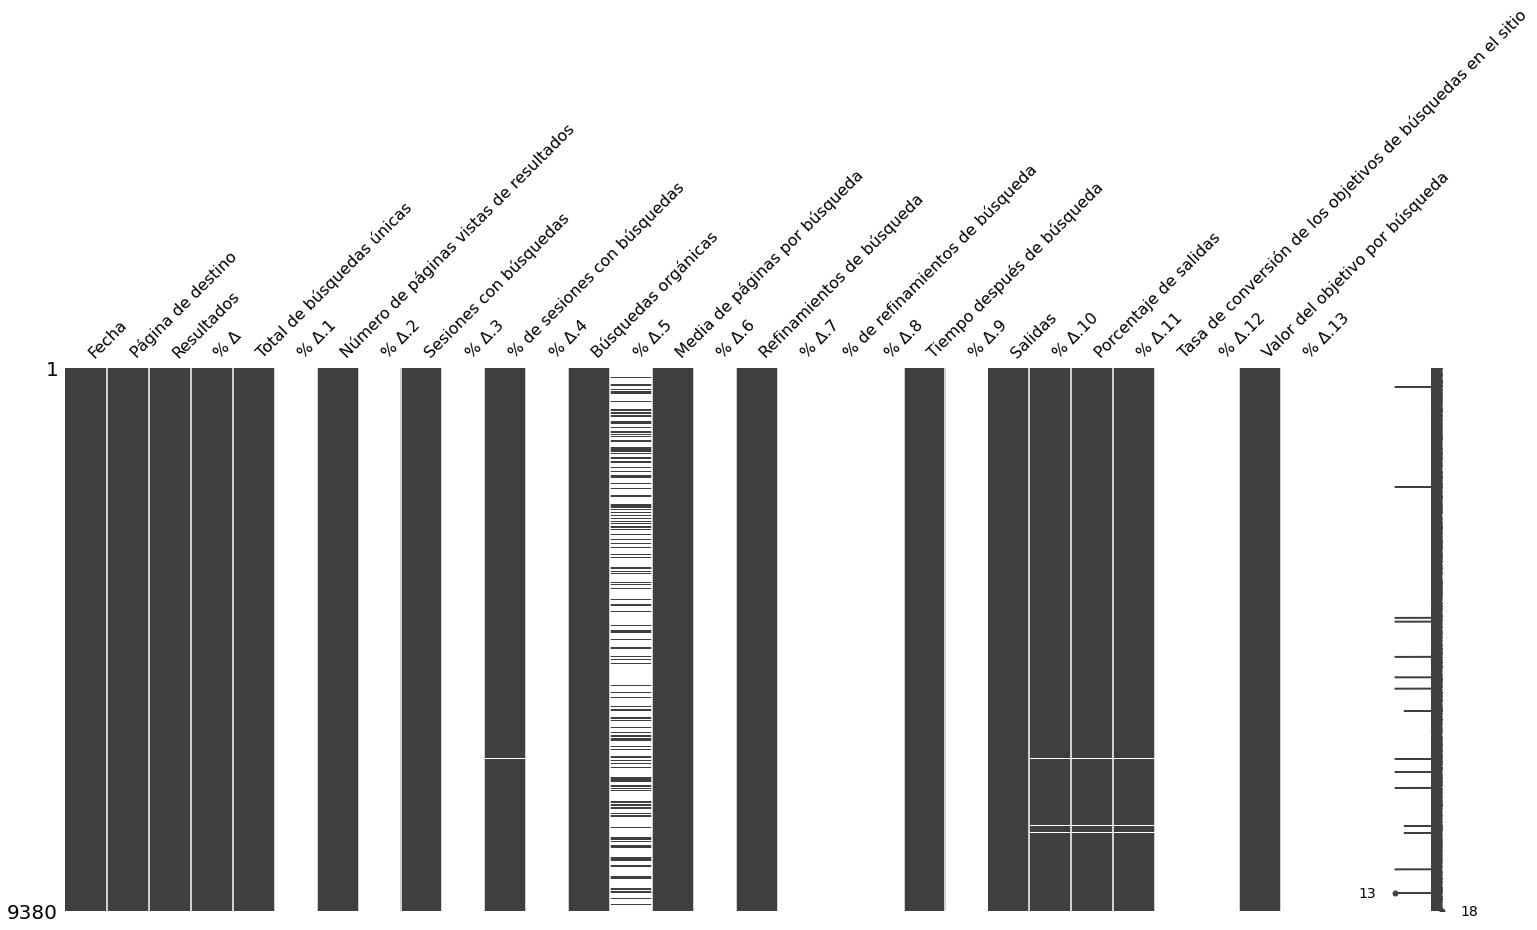

In [24]:
msno.matrix(int_search) 

In [25]:
for col in int_search:
    print("Column:", col ,'\n', int_search[col].unique(),'\n','\n')

Column: Fecha 
 [20200804 20200805 20200806 20200807 20200808 20200809 20200810 20200811
 20200812 20200813 20200814 20200815 20200816 20200817 20200818 20200819
 20200820 20200821 20200822 20200823 20200824 20200825 20200826 20200827
 20200828 20200829 20200830 20200831] 
 

Column: Página de destino 
 ['/ceramica-italia/2206-tizzo-negro-30x60-rec' '/historial-compra'
 '/ceramica-italia/3145-parket-fresno-55x55-' ...
 '/buscar?controller=search&orderby=position&orderway=desc&search_query=monser&submit_search='
 '/buscar?controller=search&orderby=position&orderway=desc&search_query=ARCHI+CENIZO&submit_search='
 '/buscar?controller=search&orderby=position&orderway=desc&search_query=grecci+claro&submit_search='] 
 

Column: Resultados 
 [    4     2     9     1   126    70    31     5    11     3    30    23
    32    20    17    12     6    58     7    71    16    10    14    52
     8    19    47    51    15   120    13   144    63    34    26    25
    59    21   384   139 10104   137

In [26]:
# COlumns with no nan values or zeros 
int_search_filt = int_search[["Fecha", "Página de destino",'Resultados','Búsquedas orgánicas','Salidas','Porcentaje de salidas']]

In [32]:
int_search_filt['Fecha'] = pd.to_datetime(int_search_filt['Fecha'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
int_search_filt.head()

,Fecha,Página de destino,Resultados,Búsquedas orgánicas,Salidas,Porcentaje de salidas
0,1970-01-01 00:00:00.020200804,/ceramica-italia/2206-tizzo-negro-30x60-rec,4,0,3,0.750000
1,1970-01-01 00:00:00.020200804,/historial-compra,2,0,2,1.000000
2,1970-01-01 00:00:00.020200804,/ceramica-italia/3145-parket-fresno-55x55-,2,0,2,1.000000
3,1970-01-01 00:00:00.020200804,/ceramica-italia/2016-marmol-senesi-60x60-primera,9,1,3,0.333333
4,1970-01-01 00:00:00.020200804,/ceramica-italia/2020-palmi-crema,1,0,1,1.000000


In [ ]:
# !pip install pandas-profiling

In [28]:
# !pip install pip==9.0.1 

In [34]:
# from pandas_profiling import ProfileReport
prof2 = ProfileReport(int_search_filt)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
prof2.to_notebook_iframe()